# Домашнее задание 1
## Harry Potter and the Action Prediction Challenge from Natural Language

*deadline*: 2 октября 2019, 23:59

В этом домашнем задании вы будете работать с корпусом Harry Potter and the Action Prediction Challenge. Корпус собран из фанфиков о Гарри Поттере и состоит из двух частей: 1) сырые тексты, 2) фрагменты текстов, описывающих ситуацию, в которой произнесено заклинание.

Корпус описан в статье: https://arxiv.org/pdf/1905.11037.pdf

David Vilares and Carlos Gómez-Rodríguez. Harry Potter and the Action Prediction Challenge from Natural Language. 2019 Annual Conference of the North American Chapter of the Association for Computational Linguistics. To appear.

Код для сбора корпуса находится в репозитории: https://github.com/aghie/hpac . Корпус можно скачать по инструкции из этого репозитория, но для экономии времени авторы задания уже скачали и подготовили данные к работе. 

Ссылки на собранный корпус: 
* Сырые тексты:  https://www.dropbox.com/s/23xet9kvbqna1qs/hpac_raw.zip?dl=0
* Токенизированные тексты в нижнем регистре: https://www.dropbox.com/s/gwfgmomdbetvdye/hpac_lower_tokenized.zip?dl=0
* train-test-dev: https://www.dropbox.com/s/3vdz0mouvex8abd/hpac_splits.zip?dl=0

Части 1, 2 задания должны быть выполнены на полных текстах (сырых или предобработанных -- на ваше усмотрение), Часть 3 – на разбиение на тестовое, отладочное и обучающее множества. Тестовое множество должно быть использовано исключительно для тестирования моделей, обучающее и отладочное – для выбора модели и параметров. 

В статье и репозитории вы найдете идеи, которые помогут вам выполнить домашнее задание. Их стоит воспринимать как руководство к действию, и не стоит их копировать и переиспользовать. Обученные модели использовать не нужно, код для их обучения можно использовать как подсказку. 

## ПРАВИЛА
1. Домашнее задание выполняется в группе до 3-х человек.
2. Домашнее задание сдается через anytask, инвайты будут дополнительно высланы.
3. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо ipython-тетрадке. 
4. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
5. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
6. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
7. Плагиат и любое недобросоветсное цитирование приводит к обнуление оценки. 


## Часть 1. [2 балла] Эксплоративный анализ 
1. Найдите топ-1000 слов по частоте без учета стоп-слов.
2. Найдите топ-10 по частоте: имен, пар имя + фамилия, пар вида ''профессор'' + имя / фамилия. 

[бонус] Постройте тематическую модель по корпусу HPAC.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для фанфиков или фентези-тематики)

## Часть 2. [2 балла] Модели представления слов 
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса HPAC.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели. 
2. Визуализируйте топ-1000 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).

## Часть 3. [5 баллов] Классификация текстов
Задача классификации формулируется так: данный фрагмент фанфика описывают какую-то ситуацию, которая предшествует произнесению заклинания. Требуется по тексту предсказать, какое именно заклинание будет произнесено. Таким образом, заклинание - это фактически метка класса. Основная мера качества – macro $F_1$.
Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на частых и редких классах. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом заклинаний?

Используйте фрагменты из множества train для обучения, из множества dev для отладки, из множества test – для тестирования и получения итоговых результатов. 

1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling. 
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте результат max pooling'а как эмбеддинг входного текста. Визуализируйте эмбеддинги 500-1000 предложений из обучающего множества и изучите свойства получившегося пространства.

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше 0.5.

## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Читали ли вы сами Гарри Поттера или фанфики о нем и помогло ли вам знание предметной области в выполнении домашнего задания?

# Часть 2

In [1]:
import pickle
import nltk
import re
import os
from tqdm import tqdm as tqdm
import gc
nltk.download('punkt')


SENTS_FILE_NAME = 'sents_source.pickle'

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikitos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
def load_text_from_file(name):
    with open(name, 'r') as f:
        return f.readlines()

def split_text_into_sent(text):
    return nltk.sent_tokenize(text)
        
def split_file_into_sent(name, save_file_name=''):
    lines = load_text_from_file(name)
    sents = []
    for line in lines:
        sents += split_text_into_sent(line)
    if save_file_name != '':
        with open(save_file_name, 'wb') as f:
            pickle.dump(sents, f)
    return sents

def split_files_in_dir_into_sent(dir_name, save_file_name=''):
    sents = []
    for file_name in tqdm(os.listdir(dir_name)):
        try:
            sents += split_file_into_sent(os.path.join(dir_name, file_name))
        except Exception as e:
            print('-------------------------')
            print(file_name)
            print(repr(e))
            print('-------------------------')
            
    if save_file_name != '':
        with open(save_file_name, 'wb') as f:
            pickle.dump(sents, f)
    return sents
sents = None

In [3]:
"""
if os.path.exists(SENTS_FILE_NAME) and os.path.isfile(SENTS_FILE_NAME):
    with open(SENTS_FILE_NAME, 'rb') as f:
        sents = pickle.load(f)
else:
    sents = split_files_in_dir_into_sent(dir_name='hpac_source/', save_file_name='sents_source.pickle')
"""

"\nif os.path.exists(SENTS_FILE_NAME) and os.path.isfile(SENTS_FILE_NAME):\n    with open(SENTS_FILE_NAME, 'rb') as f:\n        sents = pickle.load(f)\nelse:\n    sents = split_files_in_dir_into_sent(dir_name='hpac_source/', save_file_name='sents_source.pickle')\n"

In [4]:
sents = None
gc.collect()

5

# Часть 3

Объявим имена файлов. Первые 3 файла -- датасеты. Остальные файлы для быстрого запуска ячеек. "Запикленные" переменные

In [5]:
import numpy as np
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from unidecode import unidecode
import pymorphy2

TRAIN_MARKUP_NAME = 'hpac_corpus/hpac_training_128.tsv'
DEV_MARKUP_NAME = 'hpac_corpus/hpac_dev_128.tsv'
TEST_MARKUP_NAME = 'hpac_corpus/hpac_test_128.tsv'
FASTTEXT_TRAIN_NAME = 'FastText/train.txt'
FASTTEXT_TEST_NAME = 'FastText/test.txt'
FASTTEXT_DEV_NAME = 'FastText/dev.txt'
FASTTEXT_EMBEDDING_NAME = 'FastText/embedding.txt'
TRAIN_BACKUP_NAME = 'backup/train.pickle'
DEV_BACKUP_NAME = 'backup/dev.pickle'
TEST_BACKUP_NAME = 'backup/test.pickle'
EMBEDDER_BACKUP_NAME = 'backup/embedder.pickle'
FASTTEXT_BACKUP_MODEL_NAME = 'backup/fasttext_model.pickle'

m = pymorphy2.MorphAnalyzer()

regex = re.compile("[A-Za-z:=!\)\()\_\%/|]+")

Напишем функцию, которая очищает текст от всяких знаков и оставляет только текст

In [6]:
def words_only(text, regex=regex):
    try:
        return regex.findall(text)
    except:
        return []
    
def lemmatize(text, pymorphy=m):
    try:
        return " ".join([pymorphy.parse(w)[0].normal_form for w in text])
    except:
        return " "
    
def clean_text(text):
    return lemmatize(words_only(text))

Для удобства реализуем класс, который считывает разметку. Разметка -- текст и его метка (заклинание)

In [7]:
class ClassifiedObject:
    def __init__(self):
        self.class_name = None
        self.id = None
        self.text = None
        self.embedding = None
    
class MarkupReader:
    def __init__(self, file_path):
        self.__class_name_to_id = dict()
        self.__id_to_class_name = dict()
        self._read_markup(file_path)
    
    def _read_markup(self, file_path):
        self.__df = pd.read_csv(file_path, sep='\t', header=None, encoding='utf-8')
        self.__df.columns = ['Garbage', 'ClassName', 'Text']
        #self.__df['ClassName'].str.encode('utf-8')
        self.__df['Text'] = self.__df['Text'].map(unidecode)
        self.__df['Text'] = self.__df['Text'].map(clean_text)
        class_names_set = set(list(self.__df['ClassName'].values))
        for i, class_name in enumerate(class_names_set):
            self.__class_name_to_id[class_name] = i
            self.__id_to_class_name[id] = class_name
    
    def get_object_count(self):
        assert self.__df is not None
        return len(self.__df)
    
    def get_class_count(self):
        return len(self.__class_name_to_id)
    
    def get_object(self, index):
        assert self.__df is not None

        obj = ClassifiedObject()
        obj.class_name = self.__df['ClassName'].values[index]
        obj.id = self.__class_name_to_id[obj.class_name]
        obj.text = self.__df['Text'].values[index]
        return obj
        
    def make_fasttext_dataset(self, file_name):
        assert self.__df is not None
        f = open(file_name, 'w')
        for i in tqdm(range(self.get_object_count())):
            obj = self.get_object(i)
            line = '__label__' + obj.class_name + ' '
            line = line + obj.text + '\n'
            f.write(line)
        f.close()
        
    def get_text_array(self):
        return self.__df['Text'].values
        
    def get_label_array(self):
        return self.__df['ClassName'].values

Напишем функцию, которая подгружает переменную из файла backup_name

In [8]:
def get_backup(backup_name):
    if os.path.exists(backup_name) and os.path.isfile(backup_name):
        print('Found backup')
        with open(backup_name, 'rb') as f:
            return pickle.load(f)
    return None

Считываем разметку датасетов или, если есть откуда "пиклиться", то подргужаемся оттуда

In [9]:
def read_markup(file_name, backup_name):
    markup = get_backup(backup_name)
    if markup is not None:
        return markup
    markup = MarkupReader(file_name)
    with open(backup_name, 'wb') as f:
        pickle.dump(markup, f)
    print('Processed and saved')
    return markup

dev_markup = read_markup(DEV_MARKUP_NAME, DEV_BACKUP_NAME)
test_markup = read_markup(TEST_MARKUP_NAME, TEST_BACKUP_NAME)
train_markup= read_markup(TRAIN_MARKUP_NAME, TRAIN_BACKUP_NAME)

Found backup
Found backup
Found backup


In [10]:
import fasttext

Создаем датасеты для fasttext. Их мы каждый раз считаем, потому что делается это быстро

In [11]:
dev_markup.make_fasttext_dataset(FASTTEXT_DEV_NAME)
train_markup.make_fasttext_dataset(FASTTEXT_TRAIN_NAME)
test_markup.make_fasttext_dataset(FASTTEXT_TEST_NAME)

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 7679/7679 [00:00<00:00, 83261.11it/s]


Обучим модель классификации fasttext

In [12]:
def train_fasttext_model():
    if os.path.exists(FASTTEXT_BACKUP_MODEL_NAME) and os.path.isfile(FASTTEXT_BACKUP_MODEL_NAME):
        print('Found backup')
        return fasttext.load_model(FASTTEXT_BACKUP_MODEL_NAME)
    
    model = fasttext.train_supervised(FASTTEXT_TRAIN_NAME, label_prefix='__label__', epoch=200)
    model.save_model(FASTTEXT_BACKUP_MODEL_NAME)
    return model
fasttext_model = train_fasttext_model()

Получим метки классов

In [13]:
fasttext_prediction = fasttext_model.predict(test_markup.get_text_array().tolist())
fasttext_prediction = [pred[0] for pred in fasttext_prediction[0]]
fasttext_prediction = [s[len('__label__'):] for s in fasttext_prediction]

Напишем функцию для подсчета метрики $F_1$

In [14]:
from sklearn.metrics import f1_score

def calculate_f1(y_true, y_pred):
    return f1_score(y_true=y_true, y_pred=y_pred, average='macro')

In [15]:
print(calculate_f1(y_true=test_markup.get_label_array(), y_pred=fasttext_prediction))

C:\Users\nikitos\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.14389501515831182


Обучим эмбеддинги fasttext(зачем непонятно, но обучим). Если уже учили, то "пиклимся"

In [16]:
def train_embeddings(clean_texts, file_name, minn=3, maxn=4, dim=300):
    if os.path.exists(EMBEDDER_BACKUP_NAME) and os.path.isfile(EMBEDDER_BACKUP_NAME):
        print('Found backup')
        return fasttext.load_model(EMBEDDER_BACKUP_NAME)
    
    with open(file_name, 'w') as f:
        f.write('\n'.join(clean_texts))
    embedder = fasttext.train_unsupervised(file_name, minn=minn, maxn=maxn, dim=dim)
    embedder.save_model(EMBEDDER_BACKUP_NAME)
    return embedder

In [17]:
embedder = train_embeddings(train_markup.get_text_array(), FASTTEXT_EMBEDDING_NAME)

Found backup


In [18]:
len(embedder.words)

20696

In [19]:
fasttext_model = None
gc.collect()

0

In [20]:
import torch
import torch.nn as nn
import itertools
import spacy
import torchtext

Сейчас каждый пример -- текст. Нам нужны слова. Отфильтруем их. Уберем все стоп-слова, а так же пару символов, которые в процессе отладки встречались слишком часто

In [21]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stops = set(list(stopwords.words('english')) + ['!', ':', 'n'])
def from_texts_to_words(text_arr):
    words = [list(filter(lambda x: x not in stops, text.split(' '))) for text in text_arr]
    return words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikitos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Подготовим датасет к обучению

In [22]:
train_text = from_texts_to_words(train_markup.get_text_array())
test_text = from_texts_to_words(test_markup.get_text_array())
dev_text = from_texts_to_words(dev_markup.get_text_array())

train_labels = np.array(train_markup.get_label_array())
test_labels = np.array(test_markup.get_label_array())
dev_labels = np.array(dev_markup.get_label_array())

Будем хранить датасет (как в семинаре) в pytorch'овской обертке

In [23]:
TEXT = torchtext.data.Field(tokenize='spacy')
LABEL = torchtext.data.LabelField()
fields = [('text', TEXT), ('label', LABEL)]

def convert_to_dataset(text, labels):
    dataset = []
    for text, label in zip(text, labels):
        dataset += [torchtext.data.Example.fromlist([text, label], fields)]
    return torchtext.data.Dataset(dataset, fields)

train_data = convert_to_dataset(train_text, train_labels)
test_data = convert_to_dataset(test_text, test_labels)
dev_data = convert_to_dataset(dev_text, dev_labels)



    Only loading the 'en' tokenizer.



Посмотрим, как выглядит наш датасет

In [ ]:
print(train_data[0].text)

['staring', 'next', 'face', 'boggart', 'defense', 'dark', 'arts', 'class', 'scared', 'worried', 'happened', 'lysander', 'looked', 'boggart', 'front', 'previously', 'humongous', 'spider', 'eyes', 'locked', 'could', 'think', 'frightened', 'spider', 'transformed', 'lysander', 'dying', 'giggles', 'coming', 'male', 'female', 'hufflepuff', 'students', 'smirk', 'lorcan', 'face', 'lily', 'help', 'ca', 'fail', 'class', 'secret', 'love', 'lily', 'lifted', 'wand', 'said']


In [ ]:
TEXT.build_vocab(train_data, max_size=100000, min_freq=10, vectors="glove.twitter.27B.200d")
LABEL.build_vocab(train_data)

Объявим сеть, которая будет производить классификацию. Будем производить ряд 2d сверток, которые по факту 1d, которые в последствии вытягиваются в вектор и от него берется maxpool в вектор фиксированного размера, после которого идет полносвязный классифицирующий слой.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(size, embedding_dim)) for size in filter_sizes])
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)
        self.logsoftmax = nn.LogSoftmax()
        
    def forward(self, x):
        x = x.permute(1, 0)
        embedded = self.embedding(x)      
        embedded = embedded.unsqueeze(1)
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        cat = self.dropout(torch.cat((pooled), dim=1))
        return self.logsoftmax(self.fc(cat))

Напишем шаг обучения

In [ ]:
def step(model, iterator,criterion, optimizer=None, is_valid=False):
    assert is_valid or not is_valid and optimizer is not None
    model.cuda()
    loss_log = []
    f1_log = []
    
    if is_valid:
        torch.set_grad_enabled(False)
    else:
        torch.set_grad_enabled(True)
    
    for batch in iterator:
        if not is_valid:
            optimizer.zero_grad()
        
        pred = model.forward(batch.text.cuda()).squeeze(1)
        pred_classes = torch.argmax(pred, dim=-1).cpu().numpy()
        loss = criterion(pred, batch.label.cuda()).cpu()
        f1_cur = calculate_f1(pred_classes, batch.label.cpu().numpy())
        
        if not is_valid:
            loss.backward()
            optimizer.step()
            
        loss_log.append(loss.item())
        f1_log.append(f1_cur)
            
    model.cpu()
    gc.collect()
    torch.cuda.empty_cache()
    return loss_log, f1_log

Не обойтись без графиков. Взято с курса по deep_learning

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def plot_history(train_history, val_history, title='loss'):
    plt.figure()
    plt.title('{}'.format(title))
    plt.plot(train_history, label='train', zorder=1)
    
    x_points, y_points = [], []
    for x, y in val_history:
        x_points.append(x)
        y_points.append(y)
        
    plt.scatter(x_points, y_points, marker='+', s=180, c='orange', label='valid', zorder=2)
    plt.xlabel('train steps')
    
    plt.legend(loc='best')
    plt.grid()
    plt.show()

Напишем функцию обучения для одной заданной модели

In [ ]:
from IPython.display import clear_output
import torch.optim as optim

def train_model(model, epochs, train_iterator, dev_iterator, test_iterator):
  
    optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    criterion = nn.NLLLoss()
    
    train_loss_log = []
    dev_loss_log = []

    train_f1_log = []
    dev_f1_log = []

    for epoch in range(1, epochs + 1):
        train_loss, train_f1 = step(model, train_iterator, criterion, optimizer, is_valid=False)
        dev_loss, dev_f1 = step(model, dev_iterator, criterion, is_valid=True)

        train_loss_log.extend(train_loss)
        train_f1_log.extend(train_f1)
        
        train_runs = len(train_loss)
        
        dev_loss_log.append((train_runs * epoch, np.mean(dev_loss)))
        dev_f1_log.append((train_runs * epoch, np.mean(dev_f1)))

        clear_output(True)

        print('Epoch %02d' % (epoch))
        plot_history(train_loss_log, dev_loss_log, title='loss')
        plot_history(train_f1_log, dev_f1_log, title='f1-score')
        print('Train Loss: %.3f, Train f1:%.3f' % (np.mean(train_loss), np.mean(train_f1)))
        print('Dev Loss: %.3f, Dev f1: :%.3f' % (np.mean(dev_loss),np.mean(dev_f1)))
    
    
    test_loss, test_f1 = step(model, test_iterator, criterion, is_valid=True)

    print('\nTest Loss: %.3f, Test f1: :%.3f\n' % (np.mean(test_loss), np.mean(test_f1)))

Напишем функцию для инициализации модели и ее обучения с заданными параметрами

In [ ]:
def train_model_with_params(n_filters, filter_sizes, batch_size, epochs):
    model = CNN(len(TEXT.vocab), 200, n_filters, filter_sizes, train_markup.get_class_count(), 0.2)

    pretrained_embeddings = TEXT.vocab.vectors
    model.embedding.weight.data.copy_(pretrained_embeddings)

    model = model.cuda()

    train_iterator, dev_iterator, test_iterator = torchtext.data.BucketIterator.splits(
        (train_data, dev_data, test_data), 
        batch_size=batch_size, 
        sort_key=lambda x: len(x.text), 
        repeat=False)
    
    train_model(model, epochs, train_iterator, dev_iterator, test_iterator)
    
    gc.collect()
    torch.cuda.empty_cache()
    return model.cpu()

Перебор параметров будем осуществлять некрасивым способом, т.к. графики будут перекрывать друг друга

In [ ]:
params = [
    (64, [3, 3, 4, 4, 5, 5]),
    (128, [3, 4, 4, 5]),
    (256, [3, 4, 5]),
    (512, [3, 4, 5])
]
batch_size = 64
epochs = 20
cur_param = 0

Epoch 20


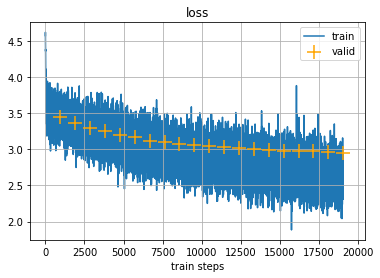

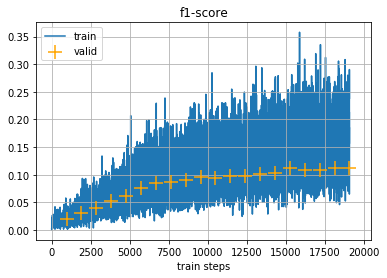

Train Loss: 2.647, Train f1:0.159
Dev Loss: 2.954, Dev f1: :0.112

Test Loss: 2.935, Test f1: :0.116



In [ ]:
n_filters, filter_sizes = params[cur_param] 

torch.cuda.empty_cache()
best_model = train_model_with_params(n_filters, filter_sizes, batch_size, epochs)
best_model = None
torch.cuda.empty_cache()
cur_param += 1

В принципе можно попробовать обучить еще больше эпох, но заметим, что ошибка на обучающей выборке стала сильно ниже, чем на тестовой. Поэтому учить дальше не будем

Epoch 20


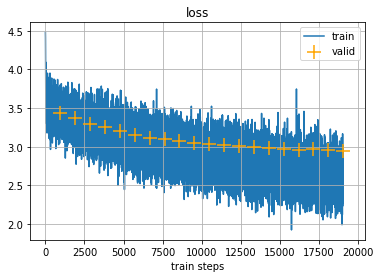

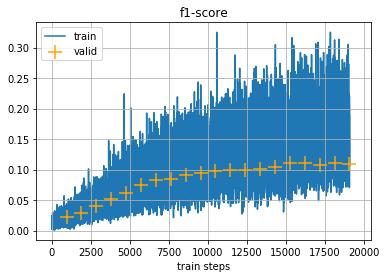

Train Loss: 2.619, Train f1:0.161
Dev Loss: 2.951, Dev f1: :0.110

Test Loss: 2.931, Test f1: :0.117



In [ ]:
n_filters, filter_sizes = params[cur_param] 

torch.cuda.empty_cache()
best_model = train_model_with_params(n_filters, filter_sizes, batch_size, epochs)
best_model = None
torch.cuda.empty_cache()
cur_param += 1

Epoch 14


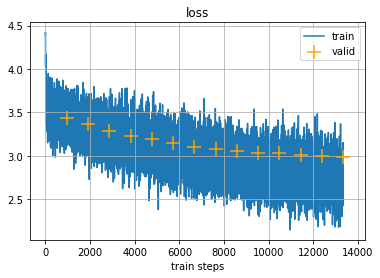

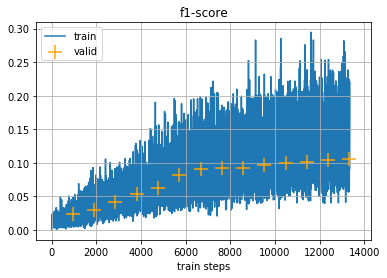

Train Loss: 2.748, Train f1:0.134
Dev Loss: 2.989, Dev f1: :0.106


In [ ]:
n_filters, filter_sizes = params[cur_param] 

torch.cuda.empty_cache()
best_model = train_model_with_params(n_filters, filter_sizes, batch_size, epochs)
best_model = None
torch.cuda.empty_cache()
cur_param += 1

In [ ]:
n_filters, filter_sizes = params[cur_param] 

torch.cuda.empty_cache()
best_model = train_model_with_params(n_filters, filter_sizes, batch_size, epochs)
best_model = None
torch.cuda.empty_cache()
cur_param += 1

Эти модели добиваются примерно одинакового качества. Однако есть предположение, что с увеличением и кол-ва фильтров, и числа сверток качество будет выше, но тогда нужно огромные вычислительные ресурсы и много вычислительного времени